In [1]:
import sys 
sys.path.append('../')

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [3]:
from fmds.models.diffusion.diffusion_sde_noise_schedule import DiffusionSDE 

In [4]:
n_samples = 10000
data , _ = make_swiss_roll(n_samples, noise=0.5)

In [5]:
data=data[:,[0,2]]

In [6]:
data.shape

(10000, 2)

In [7]:
data = torch.tensor(data, dtype = torch.float32)

In [8]:
diffusion_sde = DiffusionSDE(data,
                             input_dimension  = 2,
                             hidden_dimension  = 256,
                             number_hidden_layers=3,
                             output_dimension  = 2 ,
                             dropout_prob = 0.05,
                                
                                   epochs =1000, 
                             lr  = 0.001,
                               num_noise_levels  = 10,
                             beta_min  = 0.1,
                 beta_max  = 1.0) 


In [9]:
diffusion_sde.fit()

[Epoch 0] Avg Loss: 1567.836521
[Epoch 100] Avg Loss: 1587.171567
[Epoch 200] Avg Loss: 1555.179533
[Epoch 300] Avg Loss: 1580.173861
[Epoch 400] Avg Loss: 1564.827206
[Epoch 500] Avg Loss: 1518.302526
[Epoch 600] Avg Loss: 1527.394288
[Epoch 700] Avg Loss: 1520.886033
[Epoch 800] Avg Loss: 1470.511491
[Epoch 900] Avg Loss: 1550.141072


In [31]:
synthetic_data = diffusion_sde.generate_smld( 
                 
                   n_samples=1000,
    num_steps_per_sigma = 10,
    step_lr = 0.0000000001,
                 # steps=1000,
              
                 # num_corrector_steps=5,
                 batch_size=100   )

In [32]:
 # n_samples=1000,
 #    steps=2000,
 #    step_size=5e-5,
 #    num_corrector_steps=5,
 #    batch_size=100

In [33]:
torch.std(data, dim=0)

tensor([6.6631, 6.9758])

In [34]:
torch.std(synthetic_data, dim=0)

tensor([4.4182, 4.5656])

In [35]:
data_np = data.detach().numpy()
data_np = data_np[~np.isnan(data_np).any(axis=1)]
synthetic_data_np = synthetic_data.detach().numpy()
synthetic_data_np = synthetic_data_np[~np.isnan(synthetic_data_np).any(axis=1)]

Text(0.5, 1.0, 'Synthetic Data Generated by SDE with Predictor-Corrector')

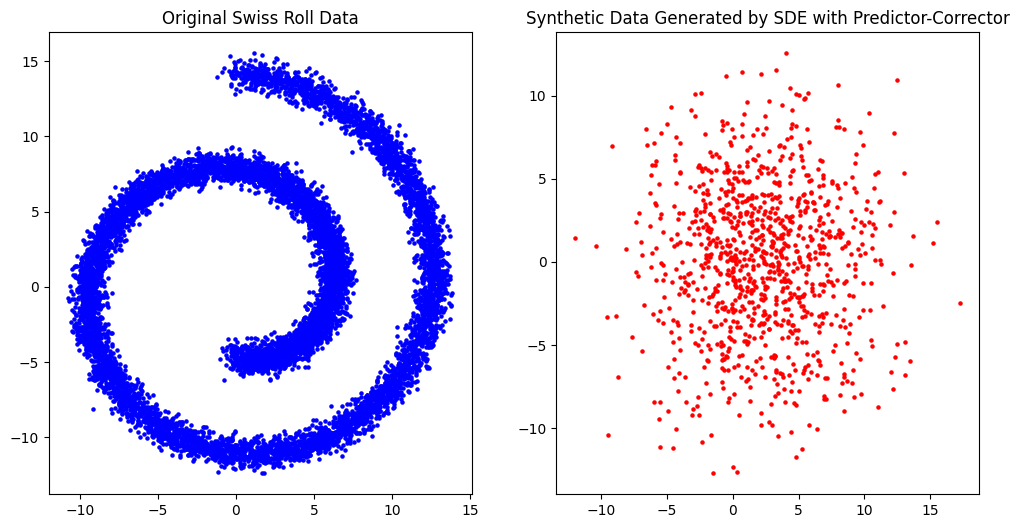

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data_np[:,0], data_np[:,1], s=5, color ='blue')
plt.title('Original Swiss Roll Data')
plt.subplot(1,2,2)
plt.scatter(synthetic_data_np[:,0], 
            synthetic_data_np[:,1],
            s=5,
            color='red')
plt.title('Synthetic Data Generated by SDE with Predictor-Corrector')
            

In [ ]:
from research.plots import qqplot

In [ ]:
for i in range(0,2):
    _=qqplot(x=data_np[:,i], y= synthetic_data_np[:,i])
    plt.show()
    plt.close()